## How to create plots in pandas

In [1]:
#line plots
#scatter plots
#histograms
#bar plots
#hexangonal binning plots

In [2]:
import pandas as pd

In [3]:
##data is hosted from the chicago data portal https://data.cityofchicago.org/
data = pd.read_csv('Traffic_Crashes.csv',index_col='CRASH_DATE',parse_dates=True)
data.head()

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (30,33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
CRASH_DATE,,,,,,,,,,,,,,,,,,,,,
2019-07-10 17:56:00,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,JC343143,NaN,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,ONE-WAY,...,0.0,0.0,3.0,0.0,17,4,7,41.919664,-87.773288,POINT (-87.773287883007 41.919663832993)
2017-06-30 16:00:00,009e9e67203442370272e1a13d6ee51a4155dac65e583d...,JA329216,NaN,35,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,...,0.0,0.0,3.0,0.0,16,6,6,41.741804,-87.740954,POINT (-87.740953581987 41.741803598989)
2020-07-10 10:25:00,ee9283eff3a55ac50ee58f3d9528ce1d689b1c4180b4c4...,JD292400,NaN,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,FOUR WAY,...,0.0,0.0,3.0,0.0,10,6,7,41.773456,-87.585022,POINT (-87.585022352022 41.773455972008)
2020-07-11 01:00:00,f8960f698e870ebdc60b521b2a141a5395556bc3704191...,JD293602,NaN,30,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,3.0,0.0,1,7,7,41.802119,-87.622115,POINT (-87.622114914961 41.802118543011)
2020-07-08 14:00:00,8eaa2678d1a127804ee9b8c35ddf7d63d913c14eda61d6...,JD290451,NaN,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DRIVEWAY,...,0.0,0.0,1.0,0.0,14,4,7,NaN,NaN,NaN


In [4]:
data.sort_index(inplace=True)

In [5]:
#filterout years 2013-2018
data= data[data.index.year>2018]

## How have the weekly numbers of craches changed over time

## How has the injury Rate Changed over time

In [6]:
data.resample('W').CRASH_RECORD_ID.count().plot(figsize=(15,5))

data.columns

In [7]:
data['INJURIES']=(data.INJURIES_TOTAL>0).astype(int)

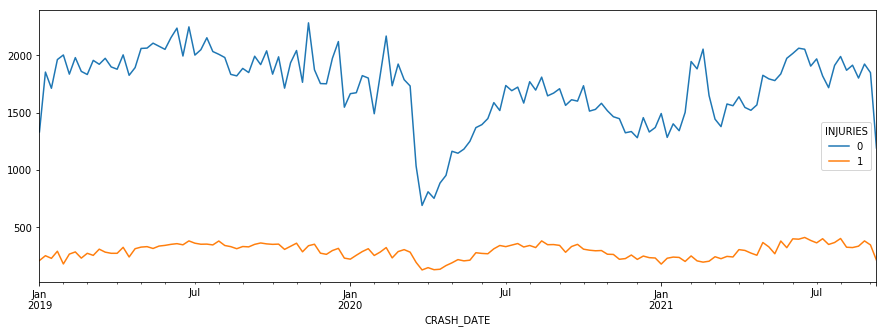

In [8]:
data.groupby('INJURIES').resample('W').CRASH_RECORD_ID.count().unstack(level=0).plot(figsize=(15,5))

## Percentage of crashes that involve injuries

In [9]:
##Total number of crashes with injuries
n_total=data.resample('W').CRASH_RECORD_ID.count()
n_total

CRASH_DATE
2019-01-06    1545
2019-01-13    2108
2019-01-20    1944
2019-01-27    2256
2019-02-03    2185
2019-02-10    2104
2019-02-17    2267
2019-02-24    2093
2019-03-03    2108
2019-03-10    2213
2019-03-17    2233
2019-03-24    2259
2019-03-31    2174
2019-04-07    2154
2019-04-14    2331
2019-04-21    2069
2019-04-28    2208
2019-05-05    2389
2019-05-12    2396
2019-05-19    2423
2019-05-26    2417
2019-06-02    2396
2019-06-09    2507
2019-06-16    2596
2019-06-23    2343
2019-06-30    2631
2019-07-07    2365
2019-07-14    2403
2019-07-21    2508
2019-07-28    2381
              ... 
2021-02-21    2252
2021-02-28    1856
2021-03-07    1689
2021-03-14    1607
2021-03-21    1824
2021-03-28    1804
2021-04-04    1946
2021-04-11    1846
2021-04-18    1798
2021-04-25    1826
2021-05-02    2195
2021-05-09    2126
2021-05-16    2051
2021-05-23    2220
2021-05-30    2298
2021-06-06    2417
2021-06-13    2460
2021-06-20    2466
2021-06-27    2293
2021-07-04    2335
2021-07-11    2222
2

In [10]:
#number of vrashes that involve injuries
n_injuries = data[data.INJURIES==1].resample('W').CRASH_RECORD_ID.count()
n_injuries

CRASH_DATE
2019-01-06    212
2019-01-13    254
2019-01-20    231
2019-01-27    293
2019-02-03    182
2019-02-10    268
2019-02-17    287
2019-02-24    233
2019-03-03    275
2019-03-10    257
2019-03-17    311
2019-03-24    285
2019-03-31    275
2019-04-07    275
2019-04-14    327
2019-04-21    243
2019-04-28    315
2019-05-05    329
2019-05-12    333
2019-05-19    317
2019-05-26    338
2019-06-02    344
2019-06-09    353
2019-06-16    359
2019-06-23    349
2019-06-30    383
2019-07-07    363
2019-07-14    354
2019-07-21    355
2019-07-28    348
             ... 
2021-02-21    198
2021-02-28    206
2021-03-07    245
2021-03-14    228
2021-03-21    248
2021-03-28    243
2021-04-04    307
2021-04-11    300
2021-04-18    277
2021-04-25    258
2021-05-02    369
2021-05-09    331
2021-05-16    271
2021-05-23    382
2021-05-30    324
2021-06-06    401
2021-06-13    398
2021-06-20    413
2021-06-27    387
2021-07-04    366
2021-07-11    402
2021-07-18    352
2021-07-25    369
2021-08-01    404

In [11]:
#perenctage
pct = 100*n_injuries/n_total

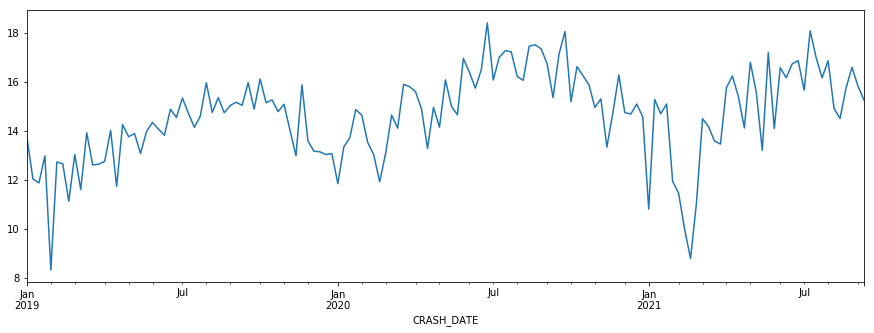

In [12]:
pct.plot(figsize=(15,5))

## are injuries more likely in different locations?

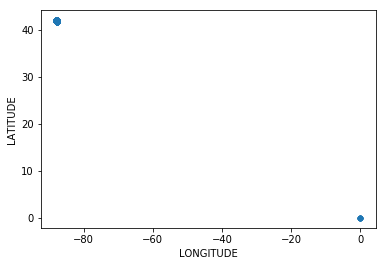

In [13]:
data.plot.scatter(x='LONGITUDE',y='LATITUDE')

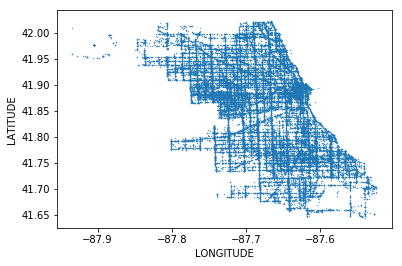

In [14]:
data[(data.LONGITUDE!=0)&(data.LATITUDE!=0) & (data.INJURIES==1)].plot.scatter(x='LONGITUDE',y='LATITUDE',s=.1)

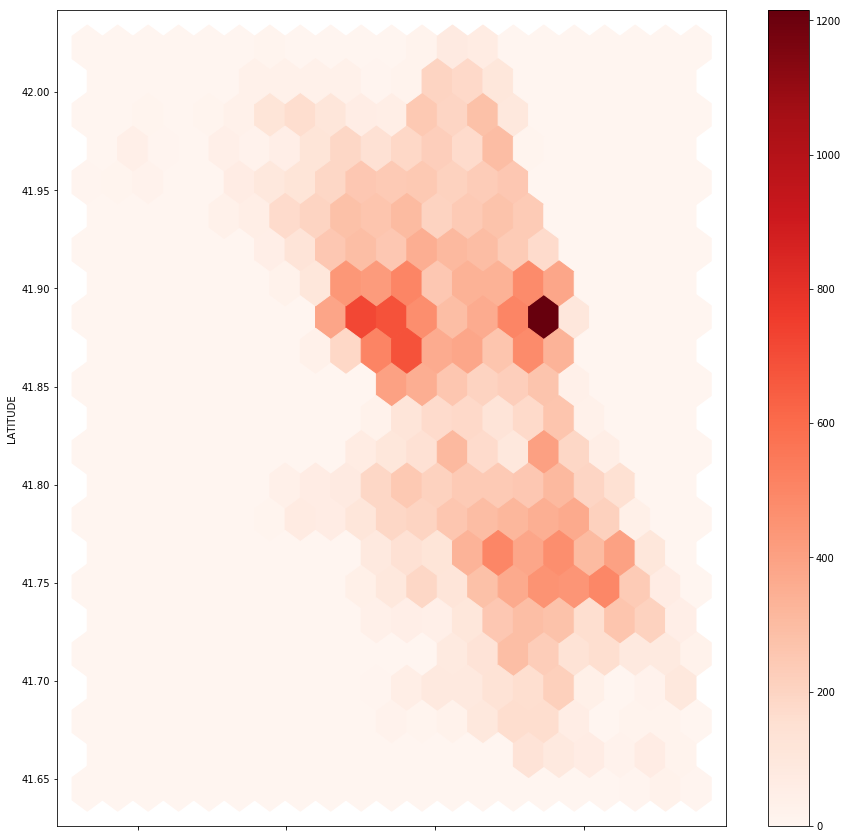

In [15]:
data[(data.LONGITUDE!=0)&(data.LATITUDE!=0) & (data.INJURIES==1)].plot.hexbin(x='LONGITUDE',y='LATITUDE',figsize=(15,15),gridsize=20,cmap='Reds')

## September 15th

## How does the injury Rate Change through the week

In [19]:
data.columns

Index(['CRASH_RECORD_ID', 'RD_NO', 'CRASH_DATE_EST_I', 'POSTED_SPEED_LIMIT',
       'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'LANE_CNT',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'REPORT_TYPE',
       'CRASH_TYPE', 'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I',
       'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LATITUDE', 'LONG

In [ ]:
#we can use groupby or pivot tables. We will use pivot tabls today

In [23]:
table = data.pivot_table(values='CRASH_RECORD_ID',index=data.index.dayofweek ,columns='INJURIES',aggfunc='count')
table.index=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
table['total']=table.sum(axis=1)
table['pct_injuries']=100*table[1]/table['total']
table

INJURIES,0,1,total,pct_injuries
Mon,33271,5567,38838,14.333900
Tue,34391,5744,40135,14.311698
Wed,34044,5840,39884,14.642463
Thu,34485,5961,40446,14.738169
Fri,39336,6564,45900,14.300654
Sat,36751,6390,43141,14.811896
Sun,30142,5495,35637,15.419368


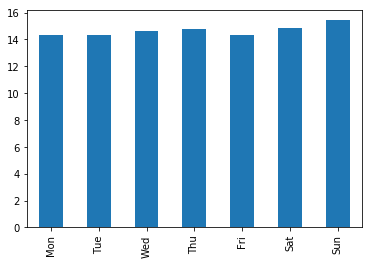

In [24]:
table.pct_injuries.plot.bar()

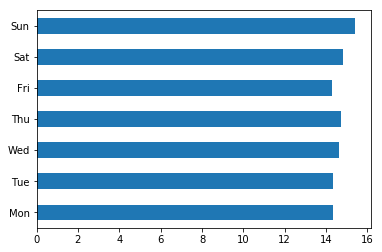

In [25]:
table.pct_injuries.plot.barh()

## How do injuries vary with 'FIRST_CRASH_TYPE'?

In [35]:
table=data.pivot_table(values='CRASH_RECORD_ID',index='FIRST_CRASH_TYPE' ,columns='INJURIES',aggfunc='count')
table['total']=table.sum(axis=1)
table['pct_injuries']=100*table[1]/table['total']
table

INJURIES,0,1,total,pct_injuries
FIRST_CRASH_TYPE,,,,
ANGLE,22752,7188,29940,24.008016
ANIMAL,203,11,214,5.140187
FIXED OBJECT,12197,2608,14805,17.615670
HEAD ON,1542,824,2366,34.826712
OTHER NONCOLLISION,751,160,911,17.563117
OTHER OBJECT,2720,361,3081,11.716975
OVERTURNED,113,89,202,44.059406
PARKED MOTOR VEHICLE,66474,2602,69076,3.766865
PEDALCYCLIST,1234,3081,4315,71.402086


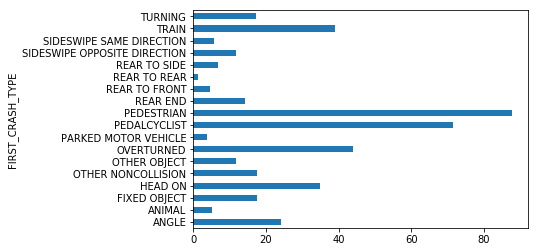

In [36]:
table.pct_injuries.plot.barh()

TypeError: barh() missing 2 required positional arguments: 'y' and 'width'

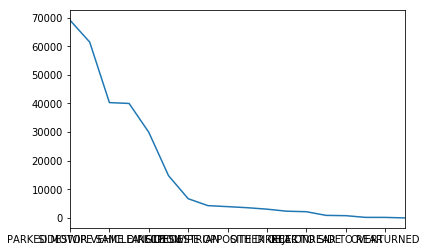

In [42]:
data.FIRST_CRASH_TYPE.value_counts().plot().barh()

In [ ]:
Advanced plots

In [80]:
weekly=data.groupby('INJURIES').resample('W').CRASH_RECORD_ID.count().unstack(level=0)
weekly

INJURIES,0,1
CRASH_DATE,,
2019-01-06,1333,212
2019-01-13,1854,254
2019-01-20,1713,231
2019-01-27,1963,293
2019-02-03,2003,182
2019-02-10,1836,268
2019-02-17,1980,287
2019-02-24,1860,233
2019-03-03,1833,275


In [81]:
import matplotlib.pyplot as plt

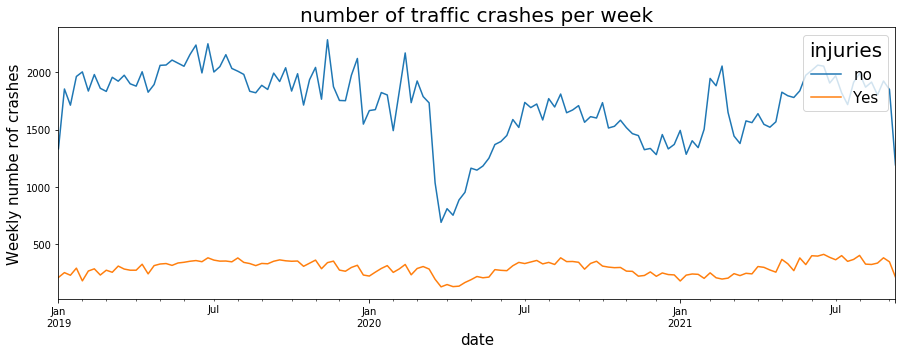

In [82]:
fig,axis=plt.subplots(figsize=(15,5))
weekly.plot(ax=axis)
#change X-axis label
axis.set_xlabel('date',fontsize=15)
#add y-axislabel
axis.set_ylabel('Weekly numbe rof crashes',fontsize=15)
axis.set_title('number of traffic crashes per week',fontsize=20)
#modify the legend
axis.legend(labels=['no','Yes'],fontsize=15,loc='upper right',title='injuries',title_fontsize=20)


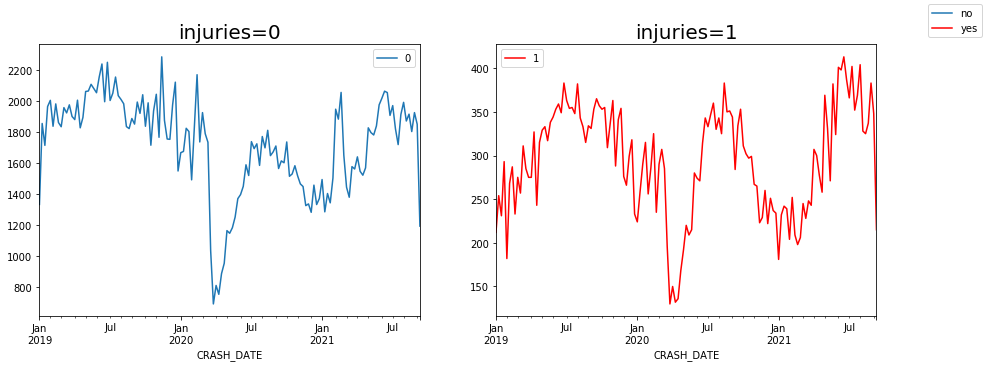

In [85]:
## two axes in one figure
fig,axis=plt.subplots(1,2,figsize=(15,5))
weekly[0].plot(ax=axis[0])
weekly[1].plot(ax=axis[1],color='red')
axis[0].set_title('injuries=0',fontsize=20)
axis[1].set_title('injuries=1',fontsize=20)
axis[0].legend()
axis[1].legend()
fig.legend(labels=['no','yes'])

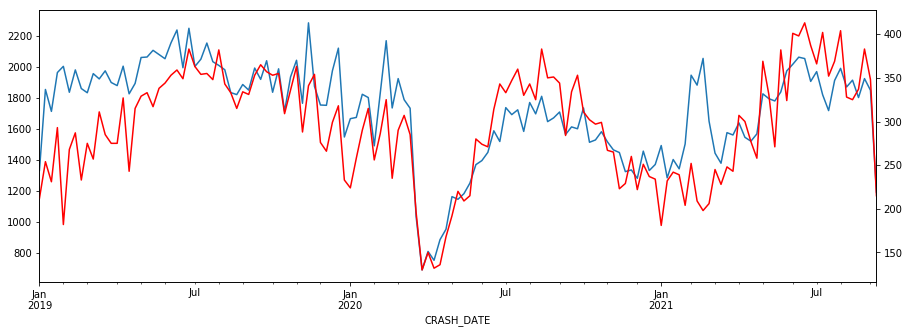

In [86]:
fig, axis=plt.subplots(figsize=(15,5))
weelky[0].plot(ax=axis)
weelky[1].plot(ax=axis.twinx(),color='red')